In [112]:
import yfinance as yf


In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [114]:
sp500 = yf.Ticker("^GSPC")

In [115]:
msft = yf.Ticker("MSFT")

[*********************100%***********************]  1 of 1 completed


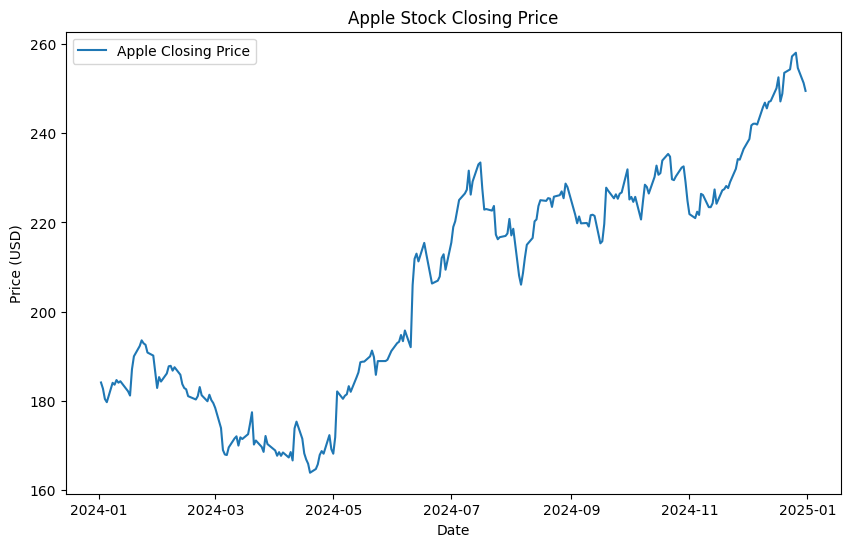

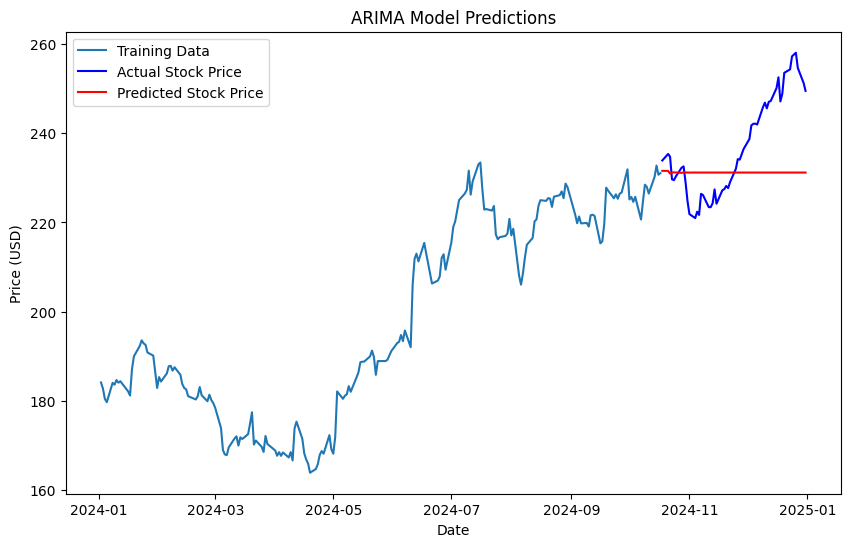

Mean Squared Error: 150.00


In [116]:
warnings.filterwarnings("ignore")  # To ignore warnings from ARIMA

# Step 1: Download  stock data
aapl = yf.download('AAPL', start='2024-01-01', end='2025-01-01')

# Step 2: Extract the 'Close' prices to use as our time series
aapl_close = aapl['Close']

# Step 3: Ensure all datetimes are timezone-naive
aapl_close.index = aapl_close.index.tz_localize(None)

# Step 4: Plot the data to visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(aapl_close, label='Apple Closing Price')
plt.title('Apple Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Step 5: Train an ARIMA model
# Split data into train and test sets
train_size = int(len(aapl_close) * 0.8)
train, test = aapl_close[:train_size], aapl_close[train_size:]

# Fit the ARIMA model on the training data
order = (5, 1, 0)  # You might need to adjust (p, d, q) after checking model performance
model = ARIMA(train, order=order)
model_fit = model.fit()

# Step 6: Make predictions using integer index positions
start_index = len(train)
end_index = len(train) + len(test) - 1
predictions = model_fit.predict(start=start_index, end=end_index, typ='levels')

# Step 7: Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Stock Price', color='blue')
plt.plot(test.index, predictions, label='Predicted Stock Price', color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Step 8: Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse:.2f}')


[*********************100%***********************]  1 of 1 completed


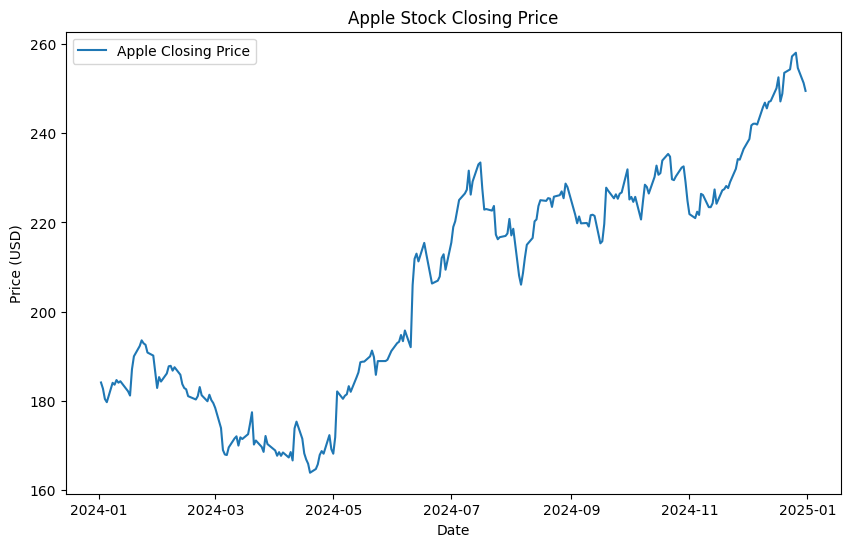

predicted=225.444669, expected=228.725494
predicted=229.307163, expected=227.939163
predicted=227.757374, expected=221.738037
predicted=221.719663, expected=219.826920
predicted=218.652791, expected=221.349838
predicted=221.010199, expected=219.797058
predicted=219.914203, expected=219.886658
predicted=219.935085, expected=219.090332
predicted=219.667394, expected=221.628540
predicted=221.776350, expected=221.738037
predicted=222.323734, expected=221.469284
predicted=221.028936, expected=215.317917
predicted=215.811018, expected=215.785721
predicted=214.197468, expected=219.667664
predicted=220.134172, expected=227.809769
predicted=228.225060, expected=227.142868
predicted=227.629667, expected=225.420883
predicted=224.583408, expected=226.316711
predicted=226.912994, expected=225.321335
predicted=224.387752, expected=226.466019
predicted=226.543377, expected=226.734756
predicted=227.476070, expected=231.920639
predicted=231.221369, expected=225.162094
predicted=225.874270, expected=225

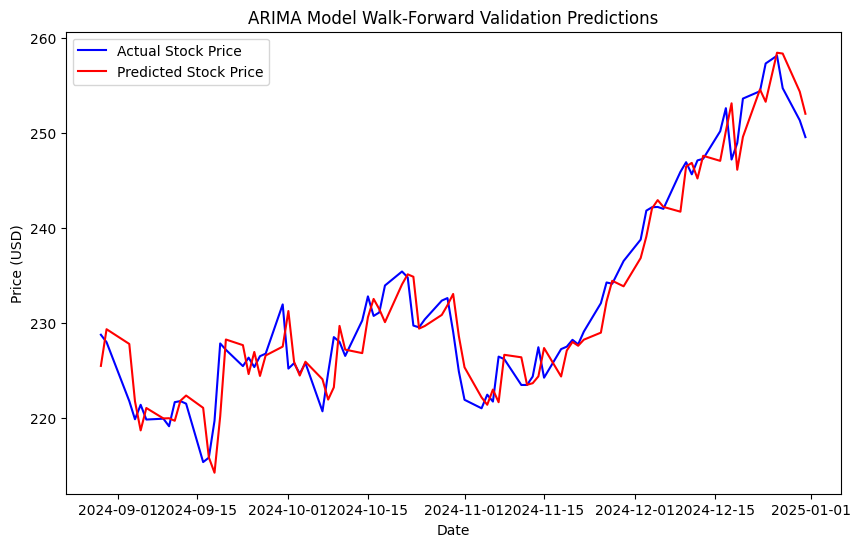

In [120]:
import warnings
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


warnings.filterwarnings("ignore")  # To ignore warnings from ARIMA


# Step 1: Download stock data
aapl = yf.download('AAPL', start='2024-01-01', end='2025-01-01')


# Step 2: Extract the 'Close' prices to use as our time series
aapl_close = aapl['Close']


# Step 3: Ensure all datetimes are timezone-naive
aapl_close.index = aapl_close.index.tz_localize(None)


# Step 4: Plot the data to visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(aapl_close, label='Apple Closing Price')
plt.title('Apple Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


# Step 5: Walk-forward validation for ARIMA model
# Split data into train and test sets
X = aapl_close.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


# Walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(4, 1, 4))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


# Step 6: Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(aapl_close.index[size:], test, label='Actual Stock Price', color='blue')
plt.plot(aapl_close.index[size:], predictions, label='Predicted Stock Price', color='red')
plt.title('ARIMA Model Walk-Forward Validation Predictions')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


Fetching FinBERT sentiment for query='Apple stock' from 2025-08-15 to 2025-09-14 (max_items=100) ...


Preparing articles: 100%|██████████| 72/72 [00:00<00:00, 1242.60it/s]


Saved sentiment to finbert_daily_sentiment.csv
Starting sentiment-enhanced walk-forward validation (SARIMAX)...
predicted=225.608885, expected=228.725494
predicted=228.763006, expected=227.939163
predicted=227.982522, expected=221.738037
predicted=220.926874, expected=219.826920
predicted=220.102886, expected=221.349838
predicted=221.352377, expected=219.797058
predicted=219.350863, expected=219.886658
predicted=220.381822, expected=219.090332
predicted=219.361184, expected=221.628540
predicted=221.586077, expected=221.738037
predicted=221.912855, expected=221.469284
predicted=221.293623, expected=215.317917
predicted=215.051169, expected=215.785721
predicted=215.651400, expected=219.667664
predicted=220.229315, expected=227.809769
predicted=228.083348, expected=227.142868
predicted=227.207808, expected=225.420883
predicted=224.901252, expected=226.316711
predicted=226.844731, expected=225.321335
predicted=224.512944, expected=226.466019
predicted=226.470748, expected=226.734756
predic

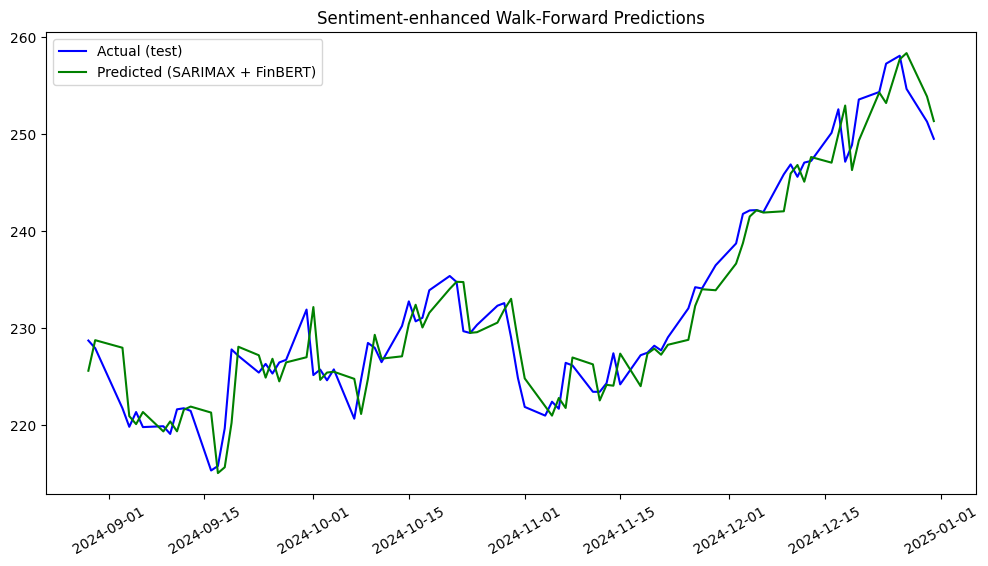

Saved merged_price_sentiment_for_arima.csv


In [119]:
# ===== Sentiment-enhanced walk-forward (SARIMAX with FinBERT exog) =====
# Paste this AFTER your existing ARMA/ARIMA cell. It will not modify your previous variables.

from sentiment_utils import compute_daily_finbert_sentiment_from_feed
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
import numpy as np
import datetime
import warnings
from urllib.parse import quote_plus

warnings.filterwarnings("ignore")

# Config: speed-friendly for CPU
QUERY = "Apple stock"               # change if you want a different query
MAX_ITEMS = 100                     # how many news items to fetch (reduce for speed)
FETCH_ARTICLE_TEXT = True           # set True if you installed newspaper and want full articles
CACHE_FILENAME = "finbert_daily_sentiment.csv"
load_cached = False                 # set True to load CSV if you've already run sentiment once

# 1) Make a price DataFrame from existing variables (aapl or aapl_close)
if 'aapl' in globals():
    price_df = aapl.reset_index().copy()
elif 'aapl_close' in globals():
    price_df = aapl_close.reset_index().rename(columns={aapl_close.name: 'Close'}).copy()
else:
    raise RuntimeError("No aapl or aapl_close found in notebook. Run the earlier cell that downloads AAPL first.")

# Flatten columns if MultiIndex (common in yfinance)
if isinstance(price_df.columns, pd.MultiIndex):
    price_df.columns = [col[0] for col in price_df.columns]

# Ensure Date column is datetime.date
price_df['Date'] = pd.to_datetime(price_df['Date']).dt.date

# 2) Get or load sentiment
if load_cached:
    sent_df = pd.read_csv(CACHE_FILENAME, parse_dates=['date'])
    sent_df['date'] = sent_df['date'].dt.date
else:
    # Override: just get last 30 days of sentiment instead of full 2024
    end_date = datetime.date.today()
    start_date = end_date - datetime.timedelta(days=30)

    print(f"Fetching FinBERT sentiment for query='{QUERY}' from {start_date} to {end_date} (max_items={MAX_ITEMS}) ...")
    encoded_query = quote_plus(QUERY)  # "Apple+stock"
    sent_df = compute_daily_finbert_sentiment_from_feed(
        encoded_query,
        start_date=start_date.strftime('%Y-%m-%d'),
        end_date=end_date.strftime('%Y-%m-%d'),
        max_items=MAX_ITEMS,
        fetch_article_text=FETCH_ARTICLE_TEXT
    )
    # Cache to speed future runs
    if not sent_df.empty:
        sent_df.to_csv(CACHE_FILENAME, index=False)
        print(f"Saved sentiment to {CACHE_FILENAME}")

if sent_df.empty:
    print("No sentiment data returned. The SARIMAX+sentiment run will use neutral sentiment (0.0) for all days.")
    sent_df = pd.DataFrame({"date": price_df['Date'].unique(), "finbert_mean": 0.0, "article_count": 0})
else:
    # ensure types and alignment
    sent_df['date'] = pd.to_datetime(sent_df['date']).dt.date

# 3) Merge price and sentiment
merged = price_df.merge(sent_df, left_on='Date', right_on='date', how='left')
merged['finbert_mean'].fillna(0.0, inplace=True)

# 4) Prepare arrays for walk-forward with exog
y_all = merged['Close'].values  # numpy array of prices
exog_all = merged['finbert_mean'].values.reshape(-1, 1)  # shape (n_obs, 1)

# same train/test split as your original cell (66% train)
size = int(len(y_all) * 0.66)
train, test = y_all[0:size], y_all[size:len(y_all)]
exog_train_all, exog_test_all = exog_all[0:size], exog_all[size:len(y_all)]

# History lists (start with training portion)
history = [x for x in train]
history_exog = [x for x in exog_train_all]  # list of 1-element arrays
predictions_sentiment = []

print("Starting sentiment-enhanced walk-forward validation (SARIMAX)...")
for t in range(len(test)):
    try:
        # Fit SARIMAX on current history with exogenous variables
        model = SARIMAX(history, exog=np.array(history_exog).reshape(len(history_exog), 1), order=(5, 1, 0))
        model_fit = model.fit(disp=False)
        # exog for the next time-step (the corresponding row from exog_test_all)
        exog_next = exog_test_all[t].reshape(1, 1)
        # forecast one-step using exog_next
        yhat = model_fit.forecast(steps=1, exog=exog_next)[0]
    except Exception as e:
        # fallback: if SARIMAX fails for some reason, use last value as naive forecast
        print(f"SARIMAX fit/forecast error at step {t}: {e}. Using last observed as prediction.")
        yhat = history[-1]
    predictions_sentiment.append(yhat)
    obs = test[t]
    # append actual obs and its exog value to history
    history.append(obs)
    history_exog.append(exog_test_all[t])
    print('predicted=%f, expected=%f' % (yhat, obs))

# 5) Evaluate forecasts
rmse_sentiment = sqrt(mean_squared_error(test, predictions_sentiment))
print('Sentiment-enhanced Test RMSE: %.3f' % rmse_sentiment)

# 6) Plot results side-by-side with dates
import matplotlib.pyplot as plt
dates_test = merged['Date'][size:].tolist()

plt.figure(figsize=(12,6))
plt.plot(dates_test, test, label='Actual (test)', color='blue')
plt.plot(dates_test, predictions_sentiment, label='Predicted (SARIMAX + FinBERT)', color='green')
plt.xticks(rotation=30)
plt.title('Sentiment-enhanced Walk-Forward Predictions')
plt.legend()
plt.show()

# 7) Save merged file for inspection
merged.to_csv("merged_price_sentiment_for_arima.csv", index=False)
print("Saved merged_price_sentiment_for_arima.csv")
# ===== end of sentiment-enhanced cell =====
